<a href="https://colab.research.google.com/github/prati25/Bike-sharing-demand/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



---



---



# **Solution :**



---



## **Import Libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from xgboost import XGBRegressor

## **Mount The Drive :**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import The Dataset :**

In [ ]:
pk=pd.read_csv("/content/drive/MyDrive/Capston Project/Bike Sharing Demand /Data & Resources/SeoulBikeData.csv",encoding ='latin')



---



---



# **Explore The Nature Of Dataset :**



---



##  **Viewing the data of top & Bottom5 rows of the data :**

In [ ]:
#Top five rows in dataset :

pk.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Bottom five rows in datasset :

pk.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#**Description Of The Dataset To Get Insights Of The Data :**

In [ ]:
#Insights of the dataset :

pk.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## **The Shape Of Dataset With Rows And Columns :**

In [ ]:
#NO. of rows and columns in datset : 

print(pk.shape)

(8760, 14)


**Dataset contains 8760 rows and 14 columns.**

  **One day = 24 Hours** 

  **365 days in a year, 365 * 24 = 8760** 

**Therefore, No.of rows in dataset = 8760**





## **Check Details In Dataset :**

In [ ]:
#Here we know the data type :

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Unique Values In Dataset :**

In [ ]:
#Check unique values :

pk.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## **Getting All The Columns Names :**

In [ ]:
#Here, we can get all columns names in dataset :

print("Features of the dataset : ")
pk.columns

Features of the dataset : 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#All complex columns names rename by another easy names :

pk=pk.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

## **Breaking Data Column :**

In [ ]:
#here, changing the "Date" column into three "year","month","day":

pk['Date'] = pk['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
pk['year'] = pk['Date'].dt.year
pk['month'] = pk['Date'].dt.month
pk['day'] = pk['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year":

pk['weekdays_weekend']=pk['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
pk=pk.drop(columns=['Date','day','year'],axis=1)

In [ ]:
pk.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
#Here,change the int64 column into catagory column :

cols=['Hour','month','weekdays_weekend']
for col in cols:
  pk[col]=pk[col].astype('category')

In [ ]:
pk.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [ ]:
#Check data type :

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
pk['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]



---




# **Preprocessing The Data :**






## **Handling To Missing Values :**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.

In [ ]:
pk.isna().sum()
pk.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64

**Here, we clear all missing values.**

## **Checking Duplicate Values :**

In [ ]:
#Checking the duplicated values in dataset :

value=len(pk[pk.duplicated()])
print("The no. of duplicated values in dataset :",value)


NameError: ignored

**Now, there are no missing and and duplicate values in dataset.**



---



---



# **Exploratory Data Analysis :**



---



## **1. Weekdays_weekend Analysis :**

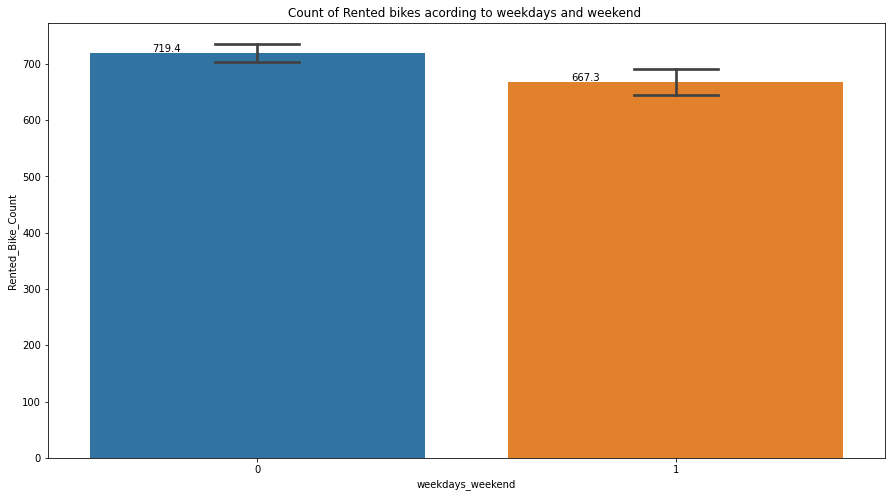

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=pk,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')


for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

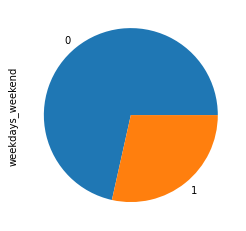

In [ ]:
pk.weekdays_weekend.value_counts(normalize=True).plot.pie()

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

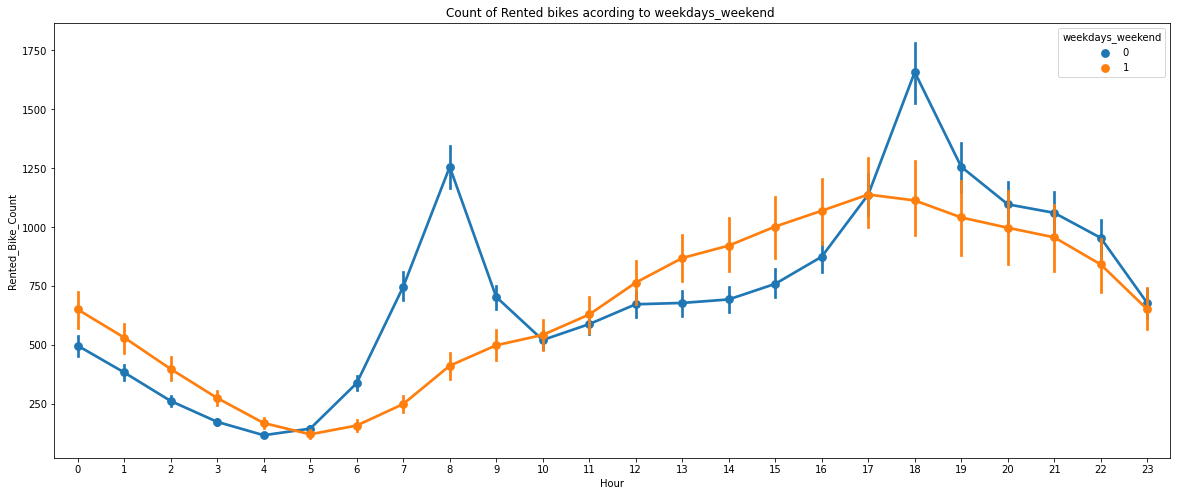

In [ ]:
#anlysis of data by  :

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=pk,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

## **2. By Hour Analysis :**

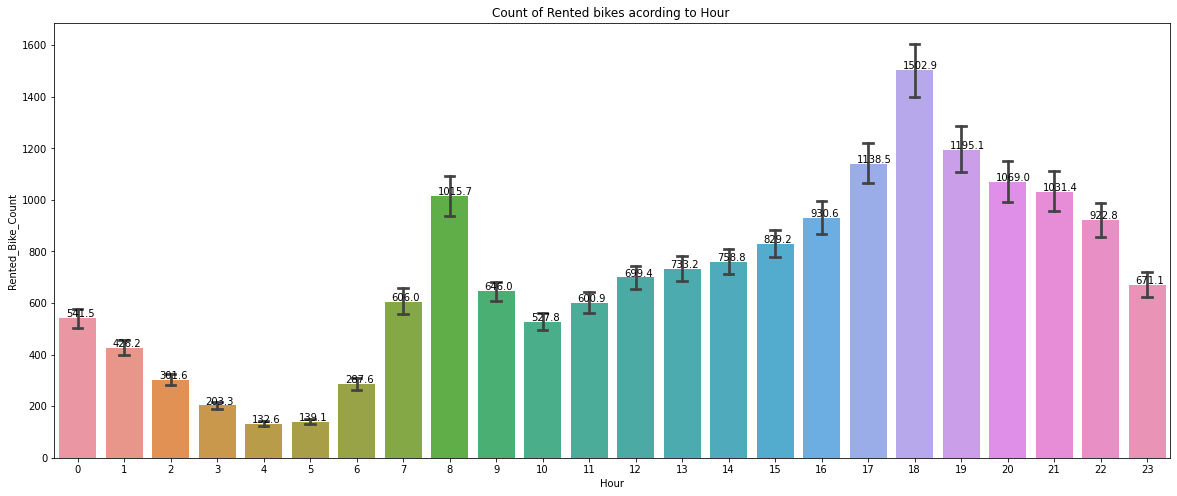

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=pk,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3.90))
plt.show()

1. In the above plot which shows the use of rented bike according the hours and the data are from all over the year.

2. generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.



## **3. By Month Analysis :**

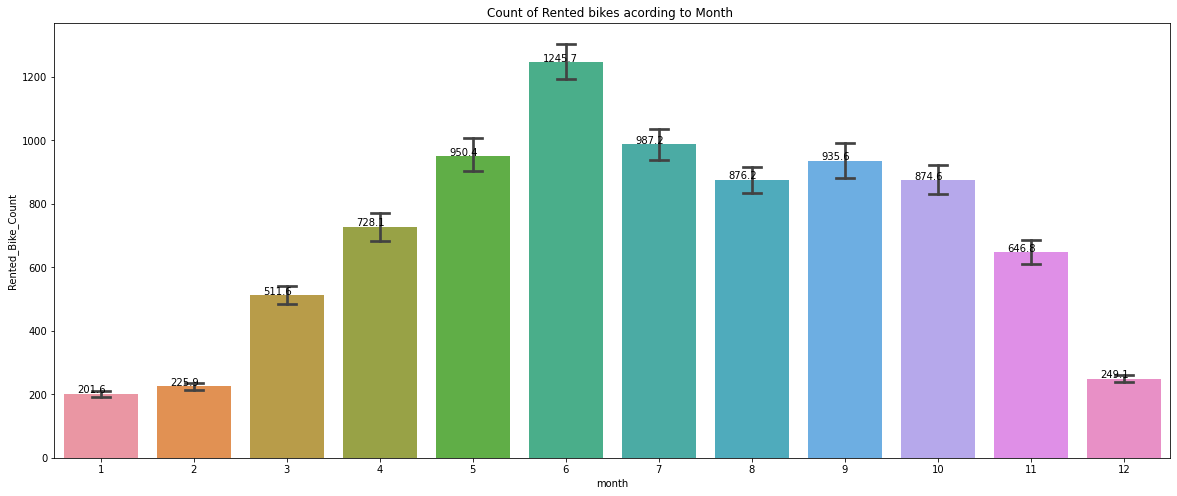

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=pk,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ') 

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

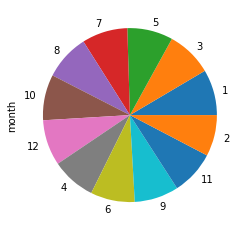

In [ ]:
pk.month.value_counts(normalize=True).plot.pie()

 ## **4. On Functioning Day Analysis :**


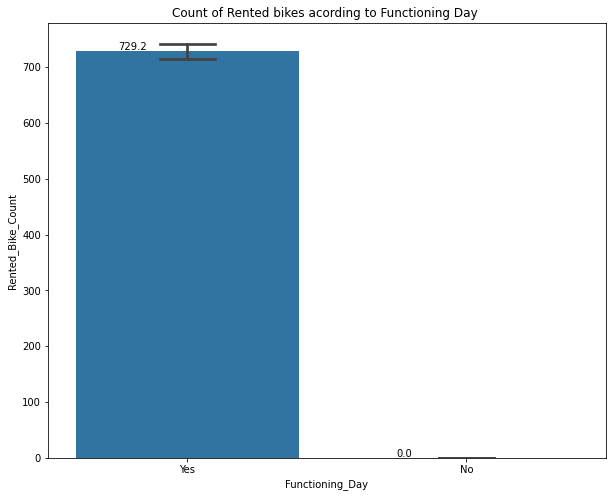

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=pk,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

**Peoples dont use reneted bikes in no functioning day.**

## **5. According To Seasons :**

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=pk,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=pk,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**1.   In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**

**2.   In winter season the use of rented bike is very low because of snowfall.**

## **6. Holiday Analysis :**

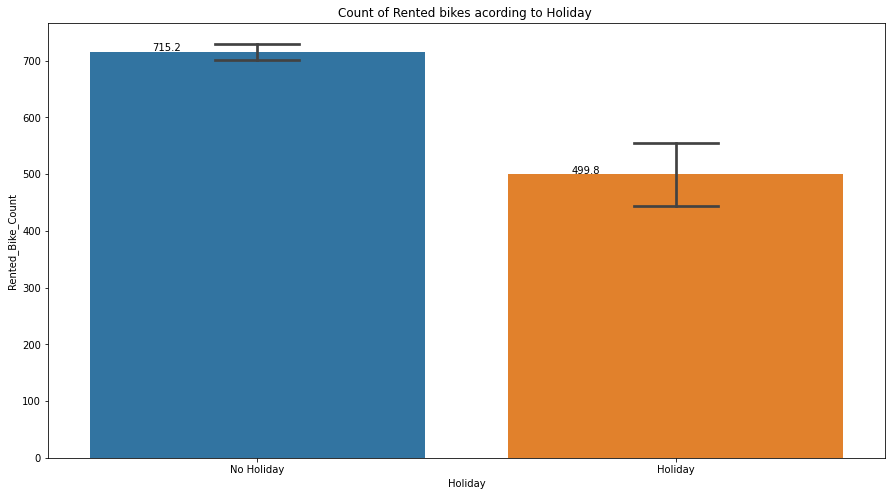

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=pk,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

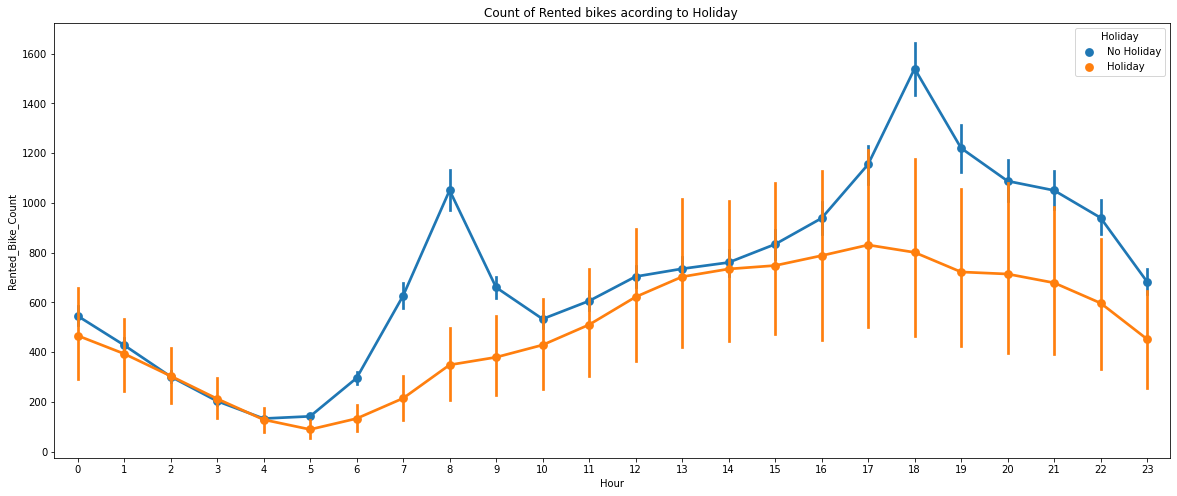

In [ ]:
#anlysis of data by vizualisation :

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=pk,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**Plot shows that in holiday people uses the rented bike from 2pm-8pm**



---



---



# **Correlation Matrix :**

In [ ]:
pk.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

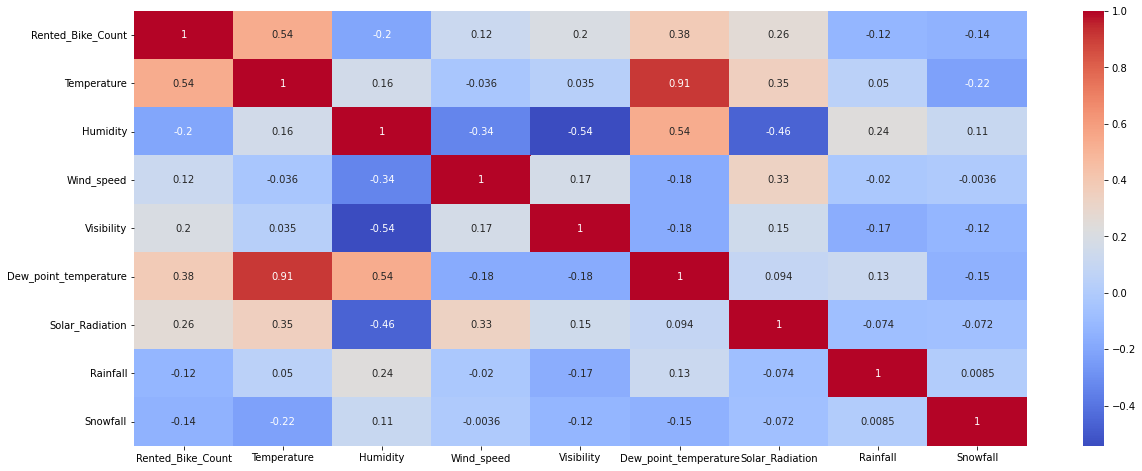

In [ ]:
corr=pk.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True,cmap='coolwarm')

In [ ]:
#drop the Dew point temperature column :

pk=pk.drop(['Dew_point_temperature'],axis=1)

In [ ]:
#load the required libraries :

from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split



---



---



# **One Hot Encoding :**

In [ ]:
#Assign all catagoriacla features to a variable :

categorical_features=list(pk.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#creat a copy :

pk_copy = pk

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    pk_copy = one_hot_encoding(pk_copy, col)
pk_copy.head()  

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0




---



---



# **Modelling Training The Dataset :**

 ## **Split the dataset into train and test in the ratio of 70:30 :**

In [ ]:
#Assign the value in X and Y : 

X = pk_copy.drop(columns=['Rented_Bike_Count'], axis=1)
Y = np.sqrt(pk_copy['Rented_Bike_Count'])

NameError: ignored

In [ ]:
X.head()

NameError: ignored

In [ ]:
Y.head()

In [ ]:
#Creat test and train data :

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
pk_copy.describe().columns



---



---



# **Linear Regression :**

## **Regression Plot :**

In [ ]:
#assign the numerical coulmn to variavle :

numerical_columns=list(pk.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

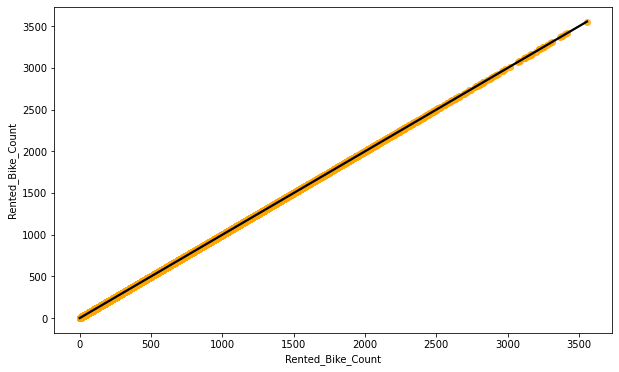

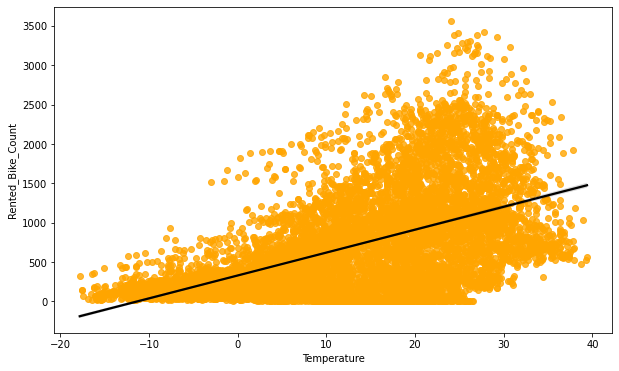

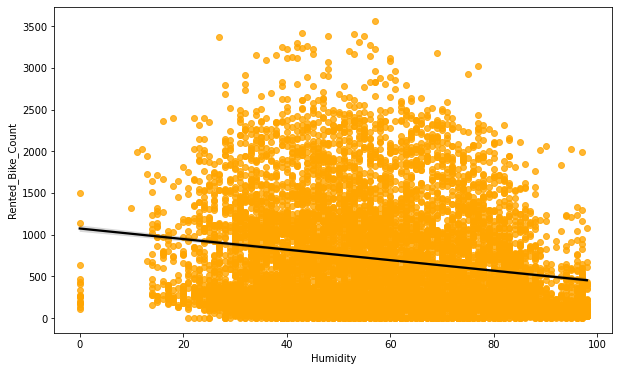

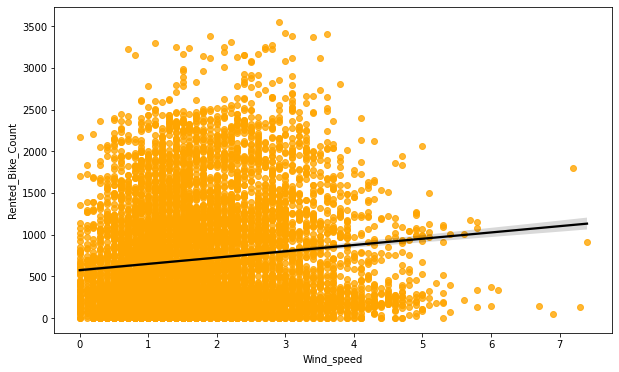

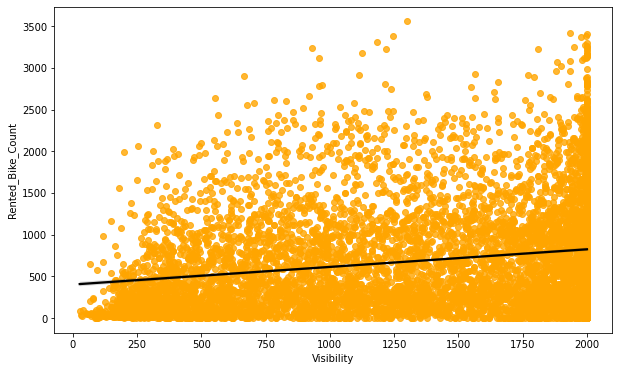

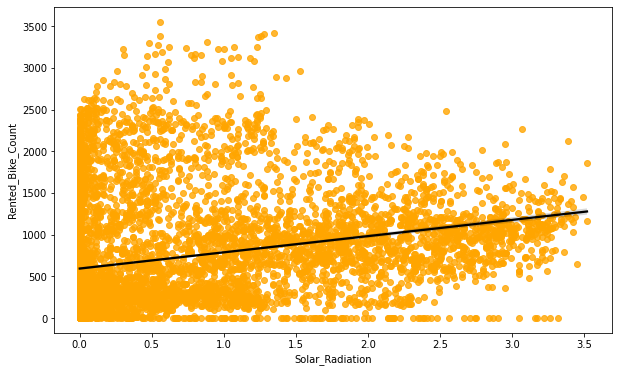

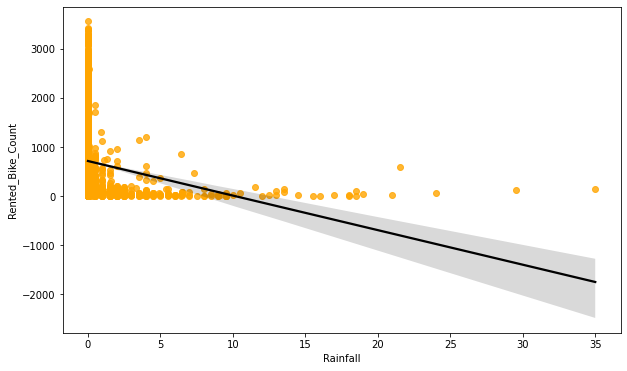

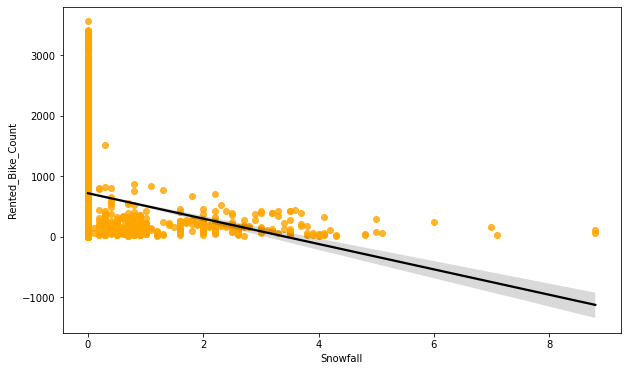

In [ ]:
#printing the regression plot for all the numerical features :

for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=pk[col],y=pk['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

**1.From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable**

**2.Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.** 



---



---



## **Providing the range of values for hyperparameters such as Number of trees:**

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees :

n_estimators = [50,100,150]

# Maximum depth of trees :

max_depth = [6,8,10]

# Minimum number of samples required to split a node :

min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node :

min_samples_leaf = [40,50]

# Learning rate :

eta = [0.05,0.08,0.1]



---



---



## **Implementation of regression model :**

In [ ]:
#import the packages :

from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, Y_train)

In [ ]:
#check the score :

reg.score(X_train, Y_train)

0.7722101548255267

In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
#check the coefficeint :

reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
#get the X_train and X-test value :

Y_pred_train=reg.predict(X_train)
Y_pred_test=reg.predict(X_test)

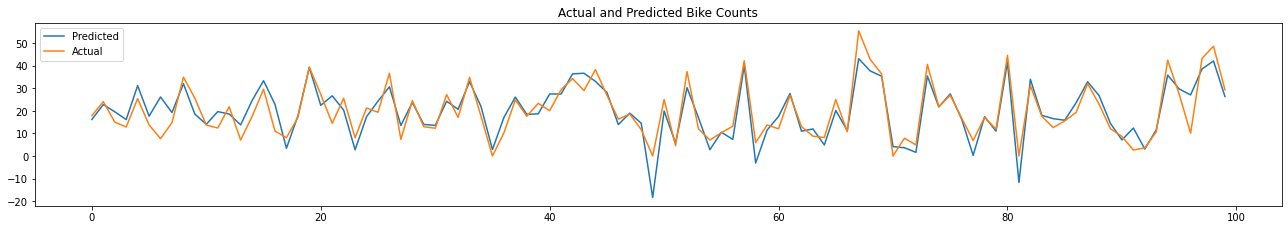

In [ ]:
# Plotting actual and predicted values and the feature importances :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred_test)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
#import the packages :

from sklearn.metrics import mean_squared_error


#calculate MSE :

MSE_lr= mean_squared_error((Y_train), (Y_pred_train))
print("MSE :",MSE_lr)


#calculate RMSE :

RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE :

MAE_lr= mean_absolute_error(Y_train, Y_pred_train)
print("MAE :",MAE_lr)



#import the packages :

from sklearn.metrics import r2_score 


#calculate r2 and adjusted r2 :

r2_lr= r2_score(Y_train, Y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


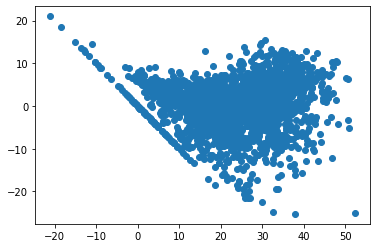

In [ ]:
### Heteroscadacity :

plt.scatter((Y_pred_test),(Y_test)-(Y_pred_test))



---



---



# **Lasso Regression**

In [ ]:
# Create an instance of Lasso Regression implementation :

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fit the Lasso model :

lasso.fit(X_train, Y_train)

# Create the model score :

print(lasso.score(X_test, Y_test), lasso.score(X_train, Y_train))

0.3873692800799008 0.40519624904934015


In [ ]:
#get the X_train and X-test value :

Y_pred_train_lasso=lasso.predict(X_train)
Y_pred_test_lasso=lasso.predict(X_test)

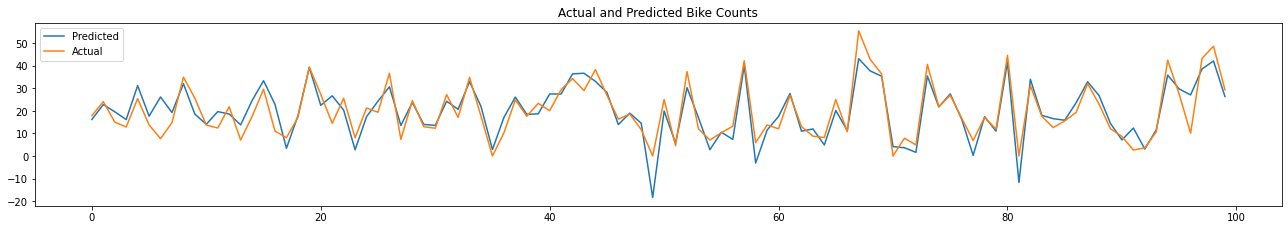

In [ ]:
# Plotting actual and predicted values and the feature importances:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred_test)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

#calculate MSE :

MSE_l= mean_squared_error((Y_train), (Y_pred_train_lasso))
print("MSE :",MSE_l)


#calculate RMSE :

RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE :

MAE_l= mean_absolute_error(Y_train, Y_pred_train_lasso)
print("MAE :",MAE_l)


#import the packages :

from sklearn.metrics import r2_score


#calculate r2 and adjusted r2 :

r2_l= r2_score(Y_train, Y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


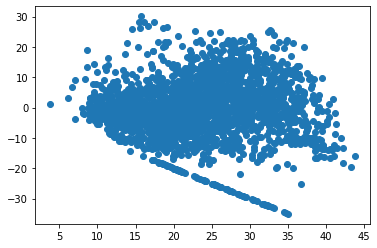

In [ ]:
#Heteroscadacity :

plt.scatter((Y_pred_test_lasso),(Y_test-Y_pred_test_lasso))



---



---



# **Ridge Regression**

In [ ]:
#import the packages :

from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL :

ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score :

ridge.score(X_train, Y_train)

0.7722100789802107

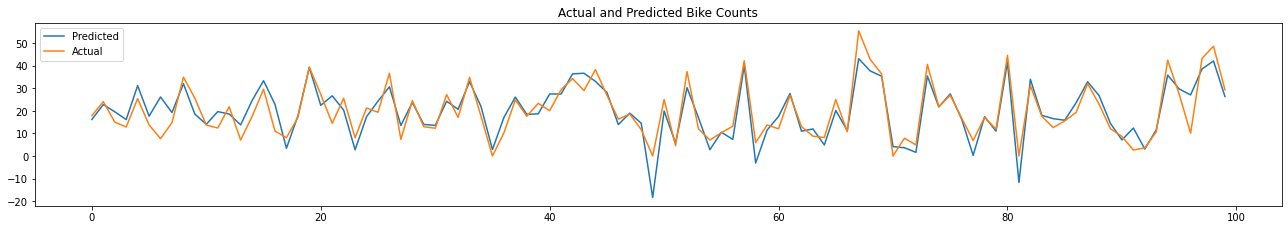

In [ ]:
# Plotting actual and predicted values and the feature importances :

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred_test)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
#get the X_train and X-test value :

Y_pred_train_ridge=ridge.predict(X_train)
Y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages :

from sklearn.metrics import mean_squared_error


#calculate MSE :

MSE_r= mean_squared_error((Y_train), (Y_pred_train_ridge))
print("MSE :",MSE_r)


#calculate RMSE :

RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE :

MAE_r= mean_absolute_error(Y_train, Y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages :

from sklearn.metrics import r2_score


#calculate r2 and adjusted r2 :

r2_r= r2_score(Y_train, Y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


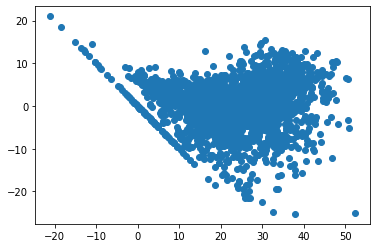

In [ ]:
#Heteroscadacity :

plt.scatter((Y_pred_test_ridge),(Y_test)-(Y_pred_test_ridge))



---



---



# **Random Forest**

In [ ]:
#import the packages :

from sklearn.ensemble import RandomForestRegressor 

# Create an instance of the RandomForestRegressor ;

rf_model = RandomForestRegressor()

rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data :

Y_pred_train_r = rf_model.predict(X_train)
Y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages :

from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,Y_train))

Model Score: 0.9898968932920965


In [ ]:
print("Model Score:",rf_model.score(X_test,Y_test))

Model Score: 0.9201916913252894


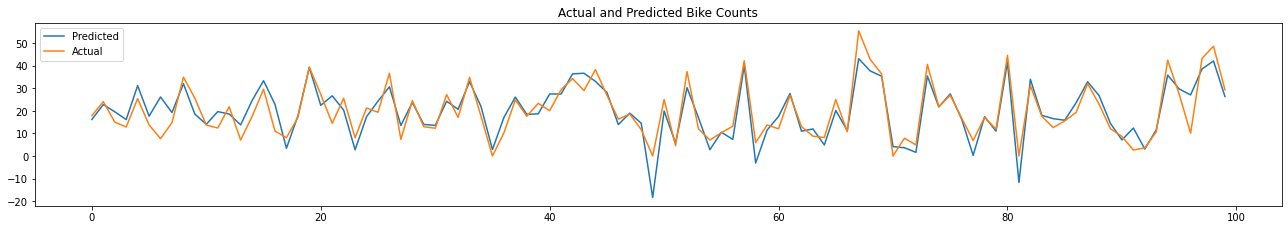

In [ ]:
# Plotting actual and predicted values and the feature importances :

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred_test)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
#import the packages :

from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,Y_train))


#calculate MSE :

MSE_rf= mean_squared_error(Y_train, Y_pred_train_r)
print("MSE :",MSE_rf)


#calculate RMSE :

RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE :

MAE_rf= mean_absolute_error(Y_train, Y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages :

from sklearn.metrics import r2_score


#calculate r2 and adjusted r2 :

r2_rf= r2_score(Y_train, Y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(Y_train, Y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9898968932920965
MSE : 1.555784259926869
RMSE : 1.2473108112763511
MAE : 0.7995955420114302
R2 : 0.9898968932920965
Adjusted R2 : 0.9896752098115776


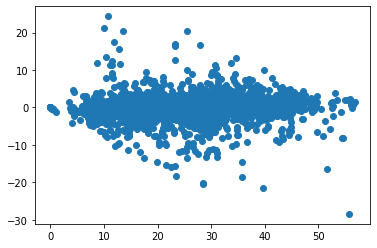

In [ ]:
#Heteroscadacity :

plt.scatter((Y_pred_test_r),(Y_test)-(Y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.15040722e-01, 1.54893144e-01, 1.22231025e-02, 1.21107175e-02,
       3.21116069e-02, 3.46425110e-02, 1.48301790e-03, 4.48208706e-03,
       1.28760187e-02, 2.01799104e-02, 2.89329158e-02, 2.49561355e-02,
       7.96623637e-03, 4.21975624e-03, 1.37074121e-02, 1.16858684e-03,
       2.23268574e-03, 1.15858741e-03, 3.27021095e-04, 2.85591603e-04,
       4.17452654e-04, 1.44503869e-03, 3.73247741e-03, 1.02134759e-02,
       3.12454032e-02, 1.80627220e-02, 1.22927047e-02, 1.28339440e-02,
       1.01092079e-02, 4.27469718e-03, 3.86681037e-03, 8.55605832e-04,
       8.88590172e-03, 3.82346805e-03, 1.51171632e-01, 3.37763814e-04,
       3.93178073e-03, 1.29068554e-03, 1.37350788e-03, 2.41788898e-03,
       7.02195714e-04, 2.30013393e-03, 7.67524347e-04, 2.78735797e-03,
       5.40304952e-03, 7.34951424e-04, 1.97248513e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:

importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.15
1,Humidity,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
25,Hour_19,0.02
11,Hour_5,0.02
46,weekdays_weekend_1,0.02


In [ ]:
#fit the model :

rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

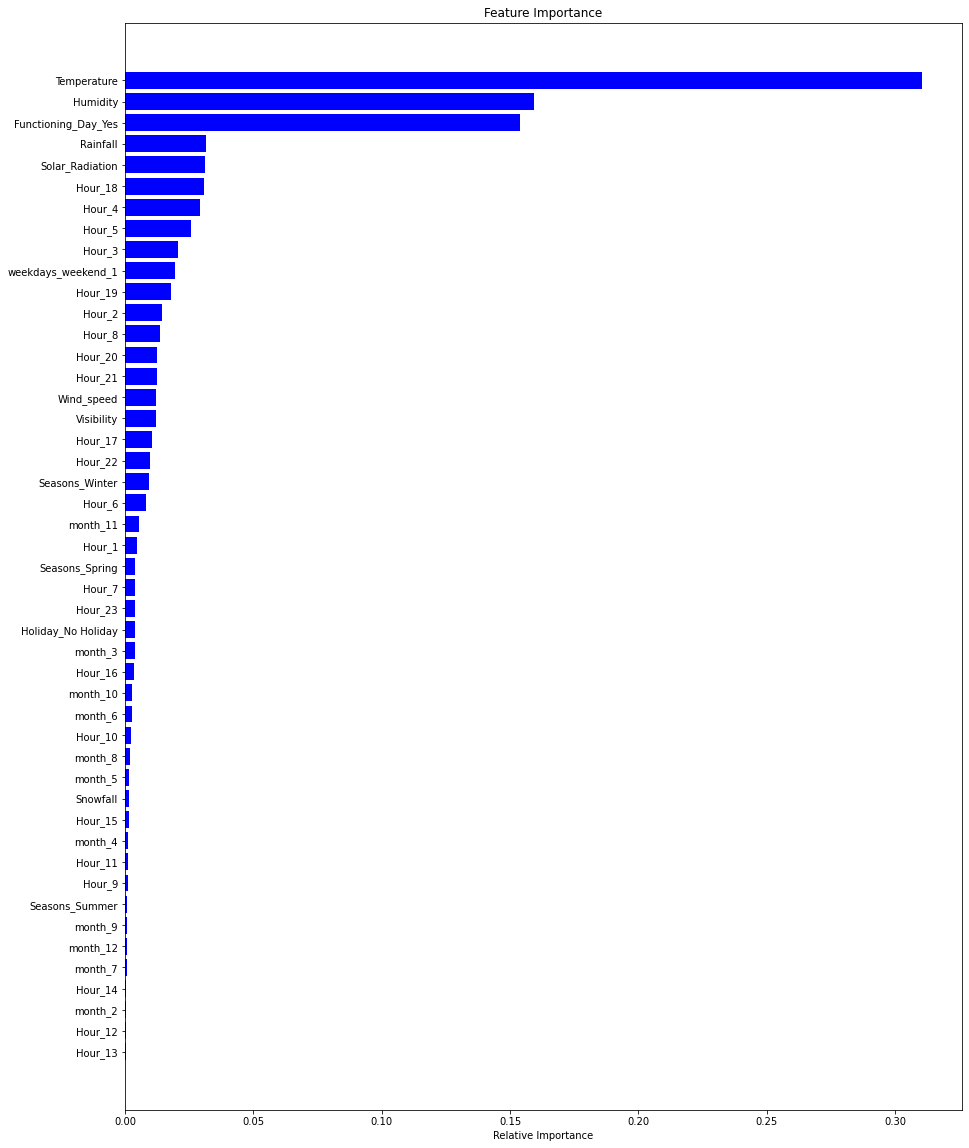

In [ ]:
#Plot the figure :

plt.figure(figsize=(15,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
X_test.iloc[-1, :]

Temperature              28.30
Humidity                 43.00
Wind_speed                1.60
Visibility             1941.00
Solar_Radiation           3.33
Rainfall                  0.00
Snowfall                  0.00
Hour_1                    0.00
Hour_2                    0.00
Hour_3                    0.00
Hour_4                    0.00
Hour_5                    0.00
Hour_6                    0.00
Hour_7                    0.00
Hour_8                    0.00
Hour_9                    0.00
Hour_10                   0.00
Hour_11                   0.00
Hour_12                   0.00
Hour_13                   0.00
Hour_14                   1.00
Hour_15                   0.00
Hour_16                   0.00
Hour_17                   0.00
Hour_18                   0.00
Hour_19                   0.00
Hour_20                   0.00
Hour_21                   0.00
Hour_22                   0.00
Hour_23                   0.00
Seasons_Spring            0.00
Seasons_Summer            1.00
Seasons_

In [ ]:
#predected value of bike count :

rf_model.predict([X_test.iloc[-1, :]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([38.24721697])

In [ ]:
#Actual value of bike count :

Y_test.iloc[-1]

37.815340802378074

In [ ]:
Y_pred = rf_model.predict(X_test)
Y_pred


array([17.67391898, 24.82523382, 16.65692816, ..., 30.89897343,
        0.        , 38.24721697])

In [ ]:
Y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented_Bike_Count, Length: 2190, dtype: float64



---



---



# **Accuracy Of Model**

In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
print("Model Score:",lasso.score(X_test,Y_test))

Model Score: 0.3873692800799008


In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
print("Model Score:",rf_model.score(X_test,Y_test))

Model Score: 0.919491695505441




---



---



# **Conclusion :**



The independent variable in data given does not have a good linear relation with the target variable so the simple linear model was not performing good on this data. Tree based algorithmns seem to perform well in this case.

Functioning day is the most influencing feature and temperature is at the second place for linear regression.

Temperature is the most important feature for random forest.

As we can say from above table the linear regresssion is not effective but in random forest model we can get more accuracy so we can use for deployment for better result.




**EDA Observation :**

1. Bike sharing demand is more in weekdays then weekend.
2. Means from this we can say that the demand for shared bikes is more during   working hours and after completion of working hours.
3. The count of rented bikes are more during the month of june with more than 1200 count.
4. So,the count of rented bikes were more during working days and the count of rented bikes were less during non working days.
5. The count of rented bikes and the demand for it is more during the month of summer with a count of nearly more than 1000.
6. From the plotting we can conclude that demand for rented bike is more when there is no holiday.

